<a href="https://colab.research.google.com/github/akheel143/fashion_mnist/blob/main/Stumble_upon_Dataset_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [4]:
 from google.colab import files
 scr=files.upload()

Saving Stumble upon.xlsx to Stumble upon.xlsx


## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
data=pd.read_excel('Stumble upon.xlsx')
y=data['label']
data1=data.drop(['url','urlid','label','alchemy_category_score','is_news','news_front_page','boilerplate'],axis=1)
replace={'business':0,'recreation':1,'health':2,'sports':3,'?':4,'arts_entertainment':5,
             'science_technology':6,'gaming':7,'culture_politics':8,'computer_internet':9,
             'law_crime':10,'religion':11,'weather':12,'unknown':13}
data1['alchemy_category']=data1['alchemy_category'].map(replace)
data1

,alchemy_category,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,24,5424,170,8,0.152941,0.079130
1,1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,40,4973,187,9,0.181818,0.125448
2,2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,55,2240,258,11,0.166667,0.057613
3,2,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,0,24,2737,120,5,0.041667,0.100858
4,3,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,14,12032,162,10,0.098765,0.082569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,9,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0,0.177043,0,0.256669,0.048780,1,38,2219,99,11,0.040404,0.071429
7391,8,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0,0.057377,0,0.218014,0.225962,1,34,5672,300,4,0.020000,0.109453
7392,1,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0,0.124122,0,0.248388,0.464286,1,43,848,76,5,0.434211,0.117647
7393,5,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0,0.097778,0,0.256070,-1.000000,0,37,386,38,0,0.026316,0.333333


In [22]:
lemma=WordNetLemmatizer()
corpus=[]
for i in range(0,len(data['boilerplate'])):
    review=re.sub('[^a-zA-Z]','',data['boilerplate'][i])
    review=review.lower()
    review=review.split()
    review=[lemma.lemmatize(word)for word in review if not word in set(stopwords.words('english'))]
    review=''.join(review)
    corpus.append(review)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(concat,y,test_size=0.2,random_state=0)


In [25]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [28]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(200,input_shape=(2521,),activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
185/185 [==============================] - 2s 6ms/step - loss: 0.3806 - accuracy: 0.8026
Epoch 2/10
185/185 [==============================] - 1s 7ms/step - loss: 0.3821 - accuracy: 0.7999
Epoch 3/10
185/185 [==============================] - 1s 7ms/step - loss: 0.3704 - accuracy: 0.8078
Epoch 4/10
185/185 [==============================] - 1s 6ms/step - loss: 0.3752 - accuracy: 0.7967
Epoch 5/10
185/185 [==============================] - 1s 7ms/step - loss: 0.3682 - accuracy: 0.8109
Epoch 6/10
185/185 [==============================] - 1s 7ms/step - loss: 0.3588 - accuracy: 0.8142
Epoch 7/10
185/185 [==============================] - 1s 7ms/step - loss: 0.3446 - accuracy: 0.8265
Epoch 8/10
185/185 [==============================] - 1s 7ms/step - loss: 0.3457 - accuracy: 0.8214
Epoch 9/10
185/185 [==============================] - 1s 6ms/step - loss: 0.3480 - accuracy: 0.8254
Epoch 10/10
185/185 [==============================] - 1s 6ms/step - loss: 0.3198 - accuracy: 0.8419

In [36]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 0s 3ms/step - loss: 1.3547 - accuracy: 0.6275


[1.3547029495239258, 0.6274510025978088]

In [37]:
y_pred=model.predict_classes(x_test)
y_pred.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(1479, 1)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.46      0.54       713
           1       0.61      0.79      0.69       766

    accuracy                           0.63      1479
   macro avg       0.64      0.62      0.61      1479
weighted avg       0.64      0.63      0.62      1479



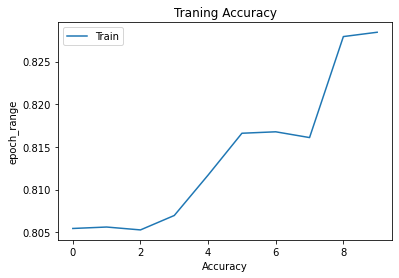

In [39]:
epoch=range(10)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(epoch,history.history['accuracy'])
plt.title('Traning Accuracy')
plt.ylabel('epoch_range')
plt.xlabel('Accuracy')
plt.legend(['Train','val'],loc='upper left')
plt.show()

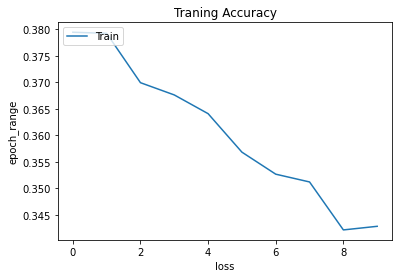

In [40]:
epoch=range(10)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(epoch,history.history['loss'])
plt.title('Traning Accuracy')
plt.ylabel('epoch_range')
plt.xlabel('loss')
plt.legend(['Train','val'],loc='upper left')
plt.show()